In [53]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [86]:
im_path = '/content/test_image3.jpg'
im = cv2.imread(im_path)

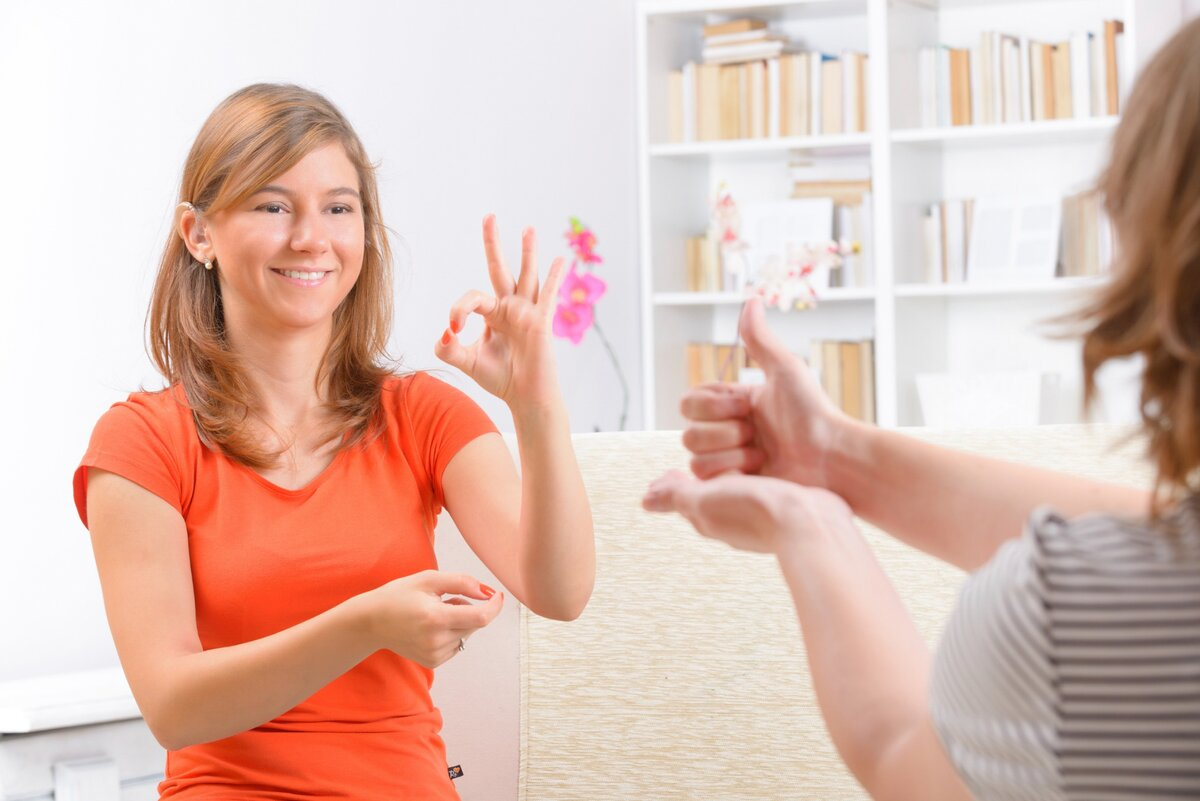

In [87]:
cv2_imshow(im)

In [88]:
im.shape

(801, 1200, 3)

In [89]:
new_size = min(im.shape[:2])

In [90]:
min_x = int(im.shape[1]/2 - new_size/2)
max_x = int(im.shape[1]/2 + new_size/2)
min_y = int(im.shape[0]/2 - new_size/2)
max_y = int(im.shape[0]/2 + new_size/2)

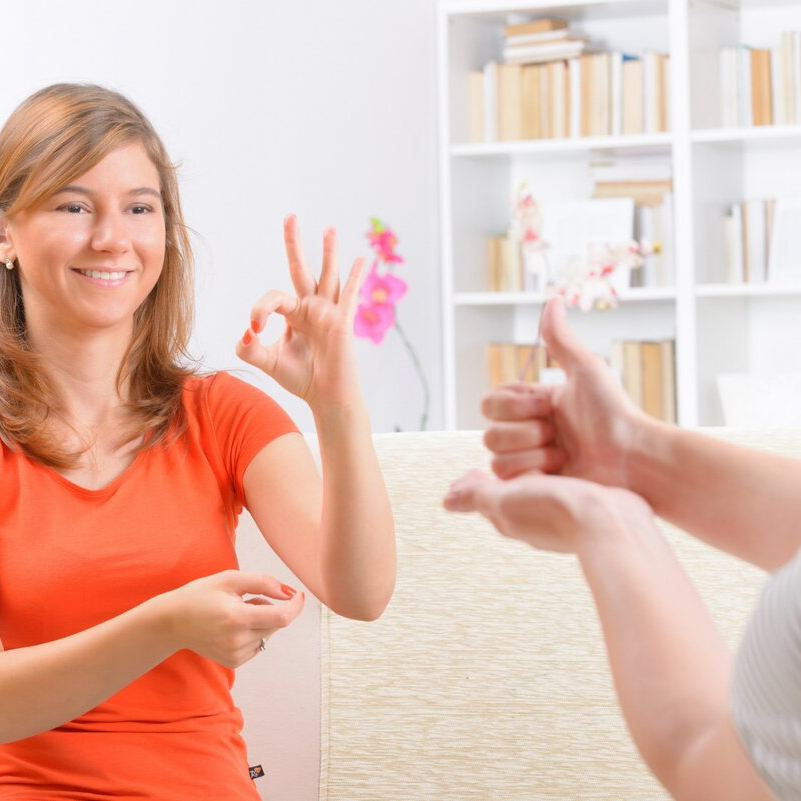

In [91]:
image = im[min_y : max_y, min_x : max_x]
cv2_imshow(image)

In [92]:
def visualize(input, faces, fps, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            print('Face {}, top-left coordinates: ({:.0f}, {:.0f}), box width: {:.0f}, box height {:.0f}, score: {:.2f}'.format(idx, face[0], face[1], face[2], face[3], face[-1]))
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(input, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(input, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(input, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(input, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(input, (coords[12], coords[13]), 2, (0, 255, 255), thickness)
    cv2.putText(input, 'FPS: {:.2f}'.format(fps), (1, 16), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [93]:
#face_detection_model = 'https://github.com/opencv/opencv_zoo/blob/main/models/face_recognition_sface/face_recognition_sface_2021dec.onnx'
face_detection_model = '/content/face_detection_yunet_2023mar.onnx'
score_threshold = 0.9
nms_threshold = 0.3
top_k = 5000
scale = 1
img1Width = int(im.shape[1]*scale)
img1Height = int(im.shape[0]*scale)
detector = cv2.FaceDetectorYN.create(
        face_detection_model,
        "",
        (320, 320),
        score_threshold,
        nms_threshold,
        top_k
    )
tm = cv2.TickMeter()
tm.start()
detector.setInputSize((img1Width, img1Height))
faces1 = detector.detect(im)
tm.stop()

assert faces1[1] is not None, 'Cannot find a face in {}'.format(im_path)
visualize(im, faces1, tm.getFPS())

Face 0, top-left coordinates: (223, 131), box width: 143, box height 195, score: 0.94


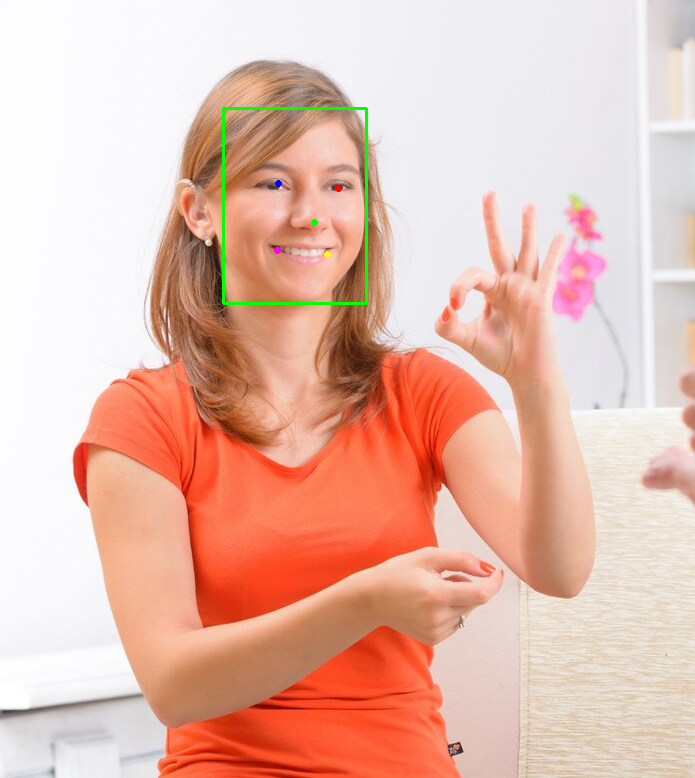

In [94]:
face_height = faces1[1][0][3]
face_width = faces1[1][0][2]
new_size = min(im.shape[0], im.shape[1], face_height*5)
y_left =  faces1[1][0][1]
x_left = faces1[1][0][0]
min_x = max(int((x_left + face_width/2) - new_size/2),0)
max_x = min(int((x_left + face_width/2) + new_size/2), im.shape[1])
min_y = max(int((y_left + face_height*3/2) - new_size/2), 0)
max_y = min(int((y_left + face_height*3/2) + new_size/2), im.shape[0])
image = im[min_y : max_y, min_x : max_x]
cv2_imshow(image)

In [95]:
image.shape

(778, 695, 3)